In [1]:
#!pip install tensorflow
#!pip install matplotlib

In [2]:
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carrega dados do CSV "train.csv"
train_data = np.loadtxt("./train.csv", delimiter=",", skiprows=1)

In [4]:
# Quantidade de dados de treino
print('images:', len(train_data))

images: 42000


In [5]:
# Separa labels das informações da imagem
Y_train = train_data[:, 0].astype(int)   # labels (dígitos 0–9)
X_train = train_data[:, 1:]              # pixels (features)

In [6]:
# Altera valores da image de (0 à 255) para (0.0 à 1.0)
X_train = X_train / 255.0

In [7]:
# Modelo de rede neural
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
# Compila o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Aruma formato dos dados das imagens para ser consumido pelo TensorFlow
X_train = X_train.reshape(-1, 28, 28)

In [10]:
# Treina o modelo
model.fit(X_train, Y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3177 - accuracy: 0.9060 - val_loss: 0.1656 - val_accuracy: 0.9493
Epoch 2/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1313 - accuracy: 0.9601 - val_loss: 0.1351 - val_accuracy: 0.9587
Epoch 3/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0887 - accuracy: 0.9726 - val_loss: 0.1047 - val_accuracy: 0.9676
Epoch 4/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.1060 - val_accuracy: 0.9688
Epoch 5/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.1350 - val_accuracy: 0.9606


In [11]:
# Faz as previsões do "x_text"
predictions = model.predict(X_train)
predicted_classes = np.argmax(predictions, axis=1)

# Comparar predições com os valores reais
accuracy = np.mean(predicted_classes == Y_train)

print("Acurácia:", accuracy * 100, "%")

1313/1313 [==============================] - 1s 933us/step
Acurácia: 97.49285714285715 %


In [12]:
# Carrega dados para teste
test_data = np.loadtxt("./test.csv", delimiter=",", skiprows=1)

In [13]:
# Quantidade de dados de teste
print('images:', len(test_data))

images: 28000


In [14]:
# Altera valores da image de (0 à 155) para (0.0 à 1.0)
X_test = test_data / 255.0

# Aruma formato dos dados das imagens para ser consumido pelo TensorFlow
X_test = X_test.reshape(-1, 28, 28)

In [15]:
# Faz as previsões do "x_text"
predictions_test = model.predict(X_test)
predicted_classes_test = np.argmax(predictions_test, axis=1)

875/875 [==============================] - 1s 1ms/step


In [16]:
print("Primeiras 10 previsões:")
for i in range(10):
    print(f"Imagem {i}: Previsto = {predicted_classes_test[i]}")

Primeiras 10 previsões:
Imagem 0: Previsto = 2
Imagem 1: Previsto = 0
Imagem 2: Previsto = 9
Imagem 3: Previsto = 0
Imagem 4: Previsto = 3
Imagem 5: Previsto = 7
Imagem 6: Previsto = 0
Imagem 7: Previsto = 3
Imagem 8: Previsto = 0
Imagem 9: Previsto = 3


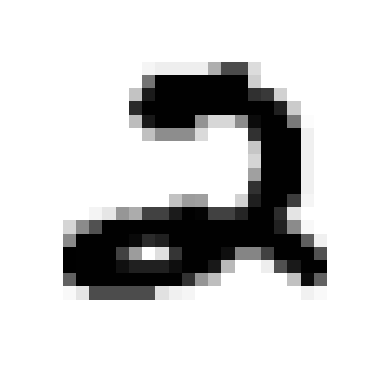

In [17]:
# Pega a primeira imagem
first_image = test_data[0].reshape(28, 28)

# Mostra a imagem com número preto e fundo branco
plt.imshow(first_image, cmap="gray_r")
plt.axis("off")  # remove os eixos
plt.show()

In [18]:
# Cria coluna ImageId (começa em 1 até N)
image_ids = np.arange(1, len(predicted_classes_test) + 1)

# Junta em um DataFrame
output = pd.DataFrame({
    "ImageId": image_ids,
    "Label": predicted_classes_test
})

In [19]:
# Salva no CSV (sem índice extra)
output.to_csv("output.csv", index=False)